# Evaluación 4: Análisis de Regresión

## Regresión Múltiple

> Requiere cargar el archivo ["Fertilidad.sav"](https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/Evaluaciones/Fertilidad.sav) en el repositorio local.

En esta sección vamos a trabajar con los datos de una investigación sobre madre primerizas. El objetivo es identificar variables psicológicas que puedan estar relacionadas a la edad a la que las mujeres evaluadas tienen su primer hijo. Cuentas con las siguientes variables: 

- Habitos: Hábitos de estudio
- Maternidad: Actitud hacia la maternidad
- Edad: Edad a la que tuvo el primer hijo

In [ ]:
!pip install pingouin

In [1]:
import pandas as pd
from sklearn.covariance import MinCovDet
import numpy as np
from sklearn.preprocessing import StandardScaler

# Carga de datos
df = pd.read_spss("Fertilidad.sav")
df.drop(columns=["Sujeto"], inplace=True)

# Pre-procesamiento para eliminar casos extremos
robust_cov = MinCovDet().fit(df)
D2 = robust_cov.mahalanobis(df)
D2_df = D2/df.shape[1]
to_drop = np.where(D2_df>2.5)
df.drop(*to_drop, inplace=True)

# Estandarización de datos
df.drop(columns=['Autonomia'], inplace=True)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=df.columns)
df

,Habitos,Maternidad,Edad
0,0.667332,1.124477,1.726894
1,0.421876,-1.361209,0.361311
2,0.421876,0.059183,0.088194
3,0.421876,-0.651013,1.180660
4,0.421876,0.059183,-0.458039
...,...,...,...
91,-1.050855,0.414281,-1.004273
92,-1.050855,1.834673,-1.277389
93,-1.050855,-0.295915,0.361311
94,-1.050855,0.769379,-0.184923


Considera el siguiente modelo de regresión múltiple:

$$ Y_{Edad} = X_{Habitos} + X_{Maternidad} $$

1. Evalúa el supuesto de linealidad de manera gŕafica e inferencial. ¿Qué puedes concluir? (1.5 pts)

In [ ]:
# Escribe tu respuesta aquí

2. Evalúa el supuesto de homocedasticidad con al menos una prueba inferencial. ¿Qué puedes concluir? (1 pt)

In [ ]:
# Escribe tu respuesta aquí

3. Evalúa gráfica e inferencialmente el supuesto de normalidad. ¿Qué puedes concluir? (1.5 pts)

In [16]:
# Escribe tu respuesta aquí

4. Examina la significancia estadística del modelo y el coeficiente de determinación. ¿Qué puedes concluir? (1.5 pts)

In [17]:
# Escribe tu respuesta aquí

5. Examina la significancia, magnitud y signo de los coeficientes de regresión. ¿Qué puedes concluir? (1.5 pts)

In [18]:
# Escribe tu respuesta aquí

## MANOVA

En esta sección vamos a trabajar con datos de trabajadores y sus resultados laborales. Cuenta con las siguientes variables:

- type: Tipo de ocupación. (prof: professional and managerial; wc: white-collar; bc: bluecollar).
- income: coeficiente de ingreso
- education: coeficiente de logro educativo
- prestige: coeficiente de prestigio ocupacional

Dale un primer vistazo a los datos:

In [8]:
duncan_data = pd.read_csv("https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-3E/datasets/Duncan.txt", sep=r'\s{1,}', engine='python')
duncan_data.reset_index(drop=True, inplace=True)
duncan_data

,type,income,education,prestige
0,prof,62,86,82
1,prof,72,76,83
2,prof,75,92,90
3,prof,55,90,76
4,prof,64,86,90
5,prof,21,84,87
6,prof,64,93,93
7,prof,80,100,90
8,wc,67,87,52
9,prof,72,86,88


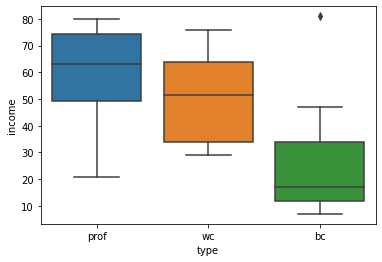

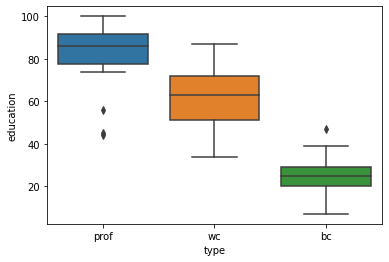

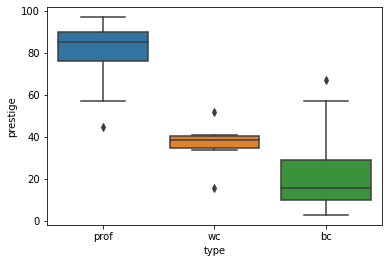

In [9]:
dep_vars = ['income','education','prestige']
ind_vars = ['type']

# Generate plots
for i in range(len(dep_vars)):
    dvar = dep_vars[i]
    plt.figure(i)
    ax = sns.boxplot(x='type', y=dvar, data=duncan_data);

Ahora, te corresponde evaluar el siguiente modelo MANOVA:

$$ Y_{income} + Y_{education} + Y_{prestige} = X_{type} $$

6. Evalúa los supuestos de normalidad y homocedasticidad multivariante de las variables dependientes. ¿Qué puedes concluir?  (2 pts)

In [19]:
# Escribe tu respuesta aquí

7. Ajusta el modelo MANOVA a tus datos e interpreta tus resultados. ¿Qué puedes concluir? (1.5 pts)

In [20]:
# Escribe tu respuesta aquí

8. Evalúa cada una de las variables dependientes por separado. ¿Qué puedes concluir? (1.5 pts)

In [21]:
# Escribe tu respuesta aquí